<a href="https://colab.research.google.com/github/TECHNONOIC/AI_SONG_GENERATION/blob/main/%E0%A4%B9%E0%A5%83%E0%A4%A6%E0%A4%AF_seva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/content/Heart_disease_pro_200.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [ ]:
df=pd.read_csv('/content/Heart_disease_pro_200.csv')

# New Section

In [ ]:
df                          # in sex section (0 = female, 1 = male)
                            #chest pain location (1 = substernal; 0 = otherwise)
                            #fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
                            #exercise induced angina (1 = yes; 0 = no)
                            #num: diagnosis of heart disease (angiographic disease status)
                            #-- Value 0: < 50% diameter narrowing
                            #-- Value 1: > 50% diameter narrowing
                            # Heart Disease (0=Absence and 1 = Presence)

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,48,1,3,124,255,1,0,175,0,0.0,1,2,3,0
195,55,0,2,135,250,0,2,161,0,1.4,2,0,3,0
196,58,0,4,100,248,0,2,122,0,1.0,2,0,3,0
197,54,0,3,110,214,0,0,158,0,1.6,2,0,3,0


In [ ]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      199 non-null    int64  
 1   Sex                      199 non-null    int64  
 2   Chest pain type          199 non-null    int64  
 3   BP                       199 non-null    int64  
 4   Cholesterol              199 non-null    int64  
 5   FBS over 120             199 non-null    int64  
 6   EKG results              199 non-null    int64  
 7   Max HR                   199 non-null    int64  
 8   Exercise angina          199 non-null    int64  
 9   ST depression            199 non-null    float64
 10  Slope of ST              199 non-null    int64  
 11  Number of vessels fluro  199 non-null    int64  
 12  Thallium                 199 non-null    int64  
 13  Heart Disease            199 non-null    int64  
dtypes: float64(1), int64(13)
m

(199, 14)

In [ ]:
Chest_pain_type = pd.get_dummies(df['Chest pain type'], prefix='Chest pain type', drop_first=True)
EKG_results = pd.get_dummies(df['EKG results'], prefix='EKG results', drop_first=True)
Number_of_vessels_fluro = pd.get_dummies(df['Number of vessels fluro'], prefix='Number of vessels fluro', drop_first=True)
Thallium = pd.get_dummies(df['Thallium'], prefix='Thallium', drop_first=True)

frames = [df, Chest_pain_type, EKG_results, Number_of_vessels_fluro, Thallium]
df = pd.concat(frames, axis=1)

df.drop(columns = ['Chest pain type', 'EKG results', 'Number of vessels fluro', 'Thallium', 'Slope of ST'])

target = df['Heart Disease'].map({'Presence':1, 'Absence':0})
inputs = df.drop(['Heart Disease'], axis=1)

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,199.0,54.472362,9.066978,34.0,47.5,55.0,61.0,76.0
Sex,199.0,0.653266,0.477130,0.0,0.0,1.0,1.0,1.0
Chest pain type,199.0,3.185930,0.969538,1.0,3.0,3.0,4.0,4.0
BP,199.0,130.834171,18.228284,94.0,120.0,130.0,140.0,200.0
Cholesterol,199.0,247.562814,53.168161,126.0,212.0,240.0,273.5,564.0
FBS over 120,199.0,0.155779,0.363560,0.0,0.0,0.0,0.0,1.0
EKG results,199.0,1.015075,0.997357,0.0,0.0,2.0,2.0,2.0
Max HR,199.0,148.080402,23.927786,71.0,130.0,152.0,165.0,195.0
Exercise angina,199.0,0.341709,0.475479,0.0,0.0,0.0,1.0,1.0
ST depression,199.0,1.015075,1.136703,0.0,0.0,0.7,1.7,5.6


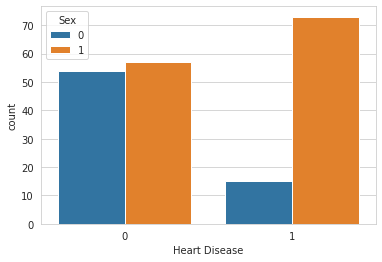

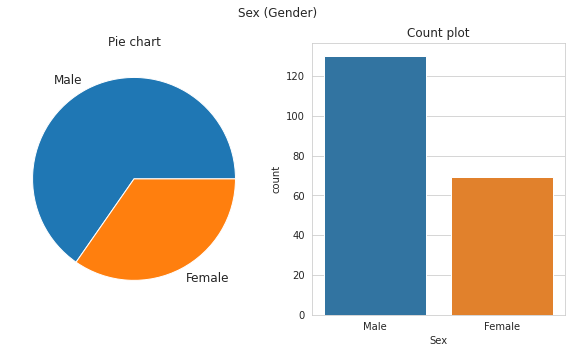

1    130
0     69
Name: Sex, dtype: int64
It can be noticed that predictor (Gender) is imbalance


In [ ]:
sns.countplot(x=df['Heart Disease'],hue='Sex',data=df)   #Here the sex count is imbalanced
labels = ['Male', 'Female']
order = df['Sex'].value_counts().index

plt.figure(figsize=(10,5))
plt.suptitle("Sex (Gender)")

plt.subplot(1,2,1)
plt.title('Pie chart')
plt.pie(df['Sex'].value_counts(), labels=labels, textprops={'fontsize':12})

plt.subplot(1,2,2)
plt.title('Count plot')
sns.countplot(x='Sex', data=df, order=order)
plt.xticks([0, 1], labels)

plt.show()

print(df['Sex'].value_counts())
print("It can be noticed that predictor (Gender) is imbalance")

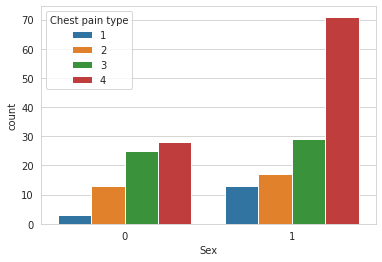

In [ ]:
sns.countplot(x=df['Sex'],hue='Chest pain type',data=df)

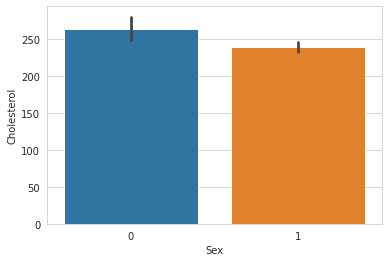

In [ ]:
sns.barplot(x=df['Sex'],y=df['Cholesterol'],data=df)

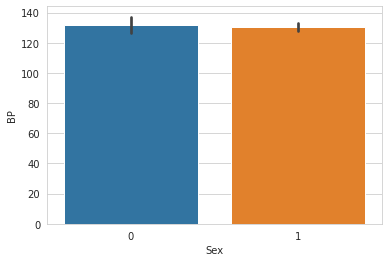

In [ ]:
sns.barplot(x=df['Sex'],y=df['BP'],data=df)

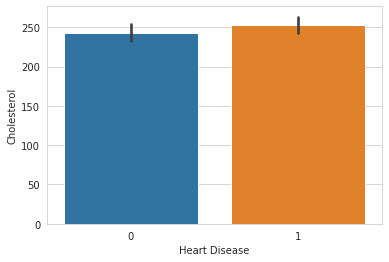

In [ ]:
sns.barplot(x=df['Heart Disease'],y=df['Cholesterol'],data=df)

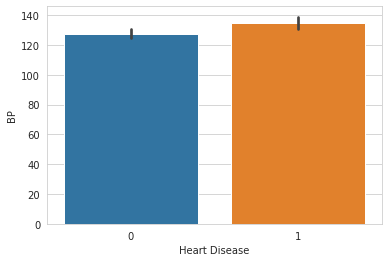

In [ ]:
sns.barplot(x=df['Heart Disease'],y=df['BP'],data=df)

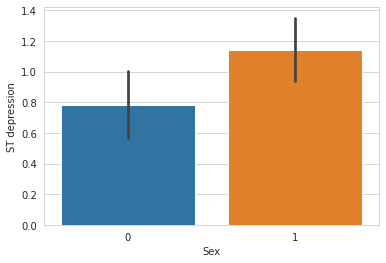

In [ ]:
sns.barplot(x=df['Sex'],y=df['ST depression'],data=df) #more males are prone to depression as compare to females

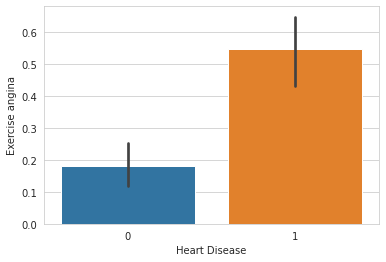

In [ ]:
sns.barplot(x=df['Heart Disease'],y=df['Exercise angina'],data=df)
#more males are prone to depression as compare to females

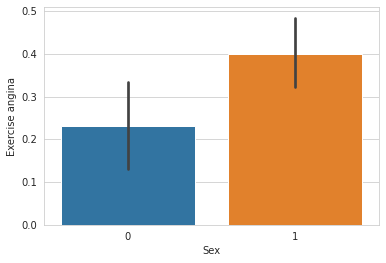

In [ ]:
sns.barplot(x=df['Sex'],y=df['Exercise angina'],data=df)
#person with high exercise angina has more chances of heart disease

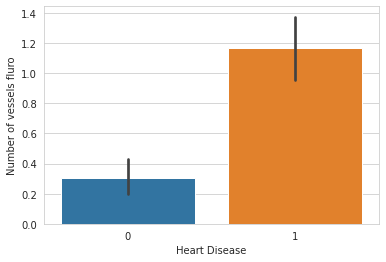

In [ ]:
# males have have high exercise angina
sns.barplot(x=df['Heart Disease'],y=df['Number of vessels fluro'],data=df)

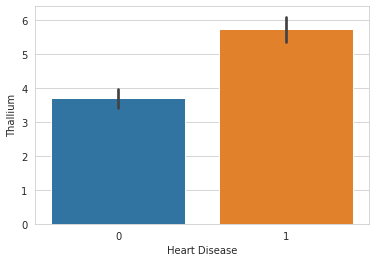

In [ ]:
#people having high Number of vessels fluro have high chances of heart disease
sns.barplot(x=df['Heart Disease'],y=df['Thallium'],data=df)

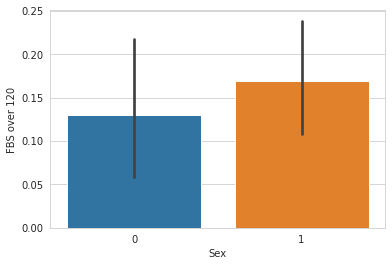

In [ ]:
#highn thallium count may lead to heart disease
sns.barplot(x=df['Sex'],y=df['FBS over 120'],data=df)

<function matplotlib.pyplot.show(*args, **kw)>

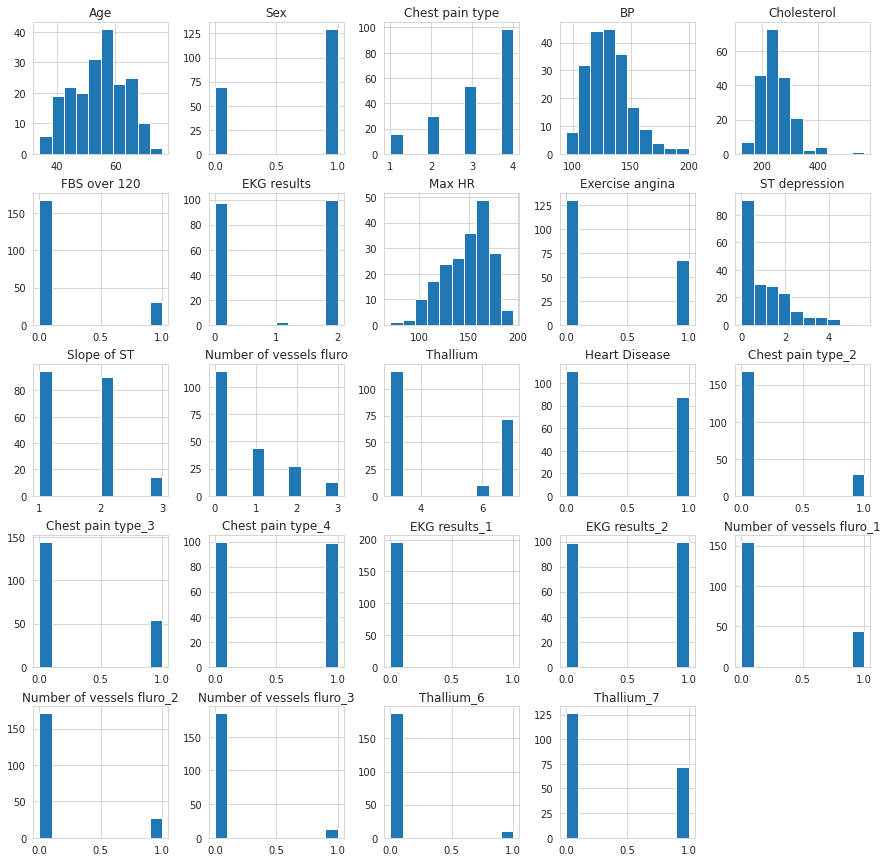

In [ ]:
df.hist(figsize =(15, 15))
plt.show

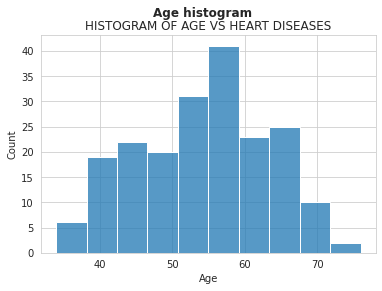

Age                           54.472362
Sex                            0.653266
Chest pain type                3.185930
BP                           130.834171
Cholesterol                  247.562814
FBS over 120                   0.155779
EKG results                    1.015075
Max HR                       148.080402
Exercise angina                0.341709
ST depression                  1.015075
Slope of ST                    1.592965
Number of vessels fluro        0.688442
Thallium                       4.597990
Heart Disease                  0.442211
Chest pain type_2              0.150754
Chest pain type_3              0.271357
Chest pain type_4              0.497487
EKG results_1                  0.010050
EKG results_2                  0.502513
Number of vessels fluro_1      0.221106
Number of vessels fluro_2      0.135678
Number of vessels fluro_3      0.065327
Thallium_6                     0.050251
Thallium_7                     0.361809
dtype: float64

In [ ]:
plt.suptitle('Age histogram', fontweight='heavy')
plt.title('HISTOGRAM OF AGE VS HEART DISEASES')
mean = np.mean(df)
sns.histplot(data=df, x='Age')
plt.show()
mean

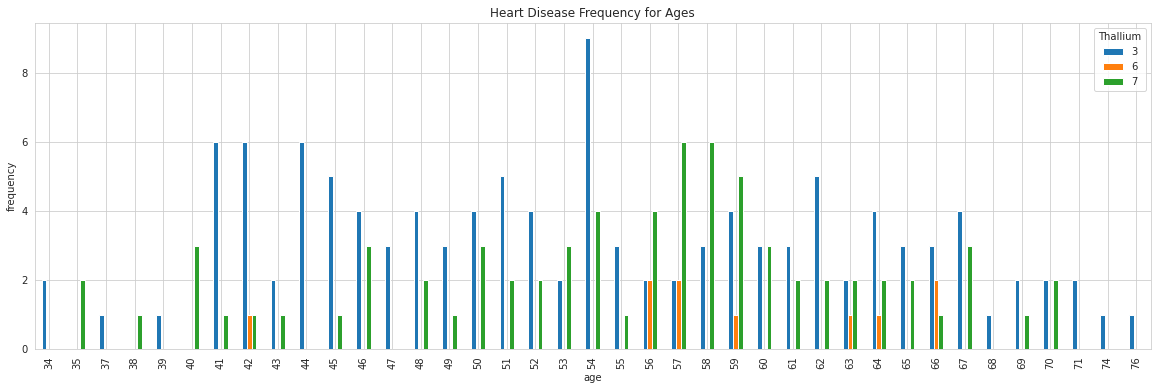

In [ ]:
pd.crosstab(df.Age, df.Thallium).plot(kind="bar",figsize=(20,6))    #thal: (3 = normal; 6 = fixed defect; 7 = reversable defect
plt.title("Heart Disease Frequency for Ages")
plt.xlabel('age')
plt.ylabel('frequency')
plt.show()

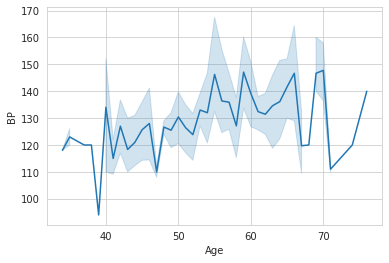

In [ ]:
sns.lineplot(x=df['Age'],y=df['BP'],data=df)
#similary here too,high bp results in more chances of disease

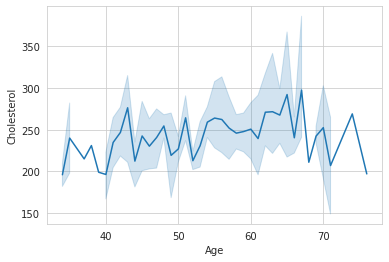

In [ ]:
sns.lineplot(x=df['Age'],y=df['Cholesterol'],data=df)
#here we can observe that bp increases at the age of 60-70

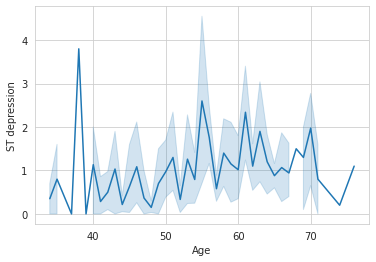

In [ ]:
sns.lineplot(x=df['Age'],y=df['ST depression'],data=df)
#similarly here the cholesterol level increases at the age group of 50-65

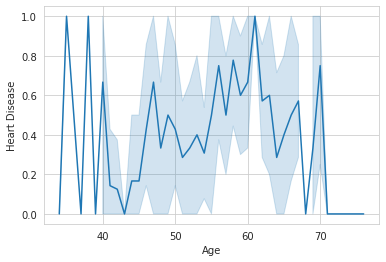

In [ ]:
sns.lineplot(x=df['Age'],y=df['Heart Disease'],data=df) # as the age increases heart desease also increase
                                                        # you can see it in the graph age 55 to 70

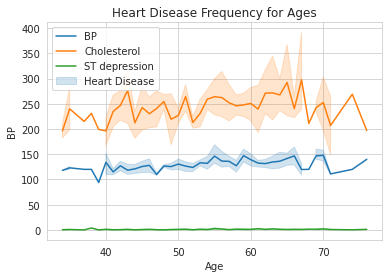

In [ ]:
sns.lineplot(x=df['Age'],y=df['BP'],data=df)
sns.lineplot(x=df['Age'],y=df['Cholesterol'],data=df)
sns.lineplot(x=df['Age'],y=df['ST depression'],data=df).set(title="Heart Disease Frequency for Ages")
plt.legend(labels=["BP","Cholesterol","ST depression","Heart Disease"])
plt.show ()

In [ ]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
le=LabelEncoder()
df['Heart Disease']=le.fit_transform(df['Heart Disease'])

In [ ]:
y=df['Heart Disease']
x=df.drop(['Heart Disease'],axis=1)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)

<Figure size 432x288 with 0 Axes>

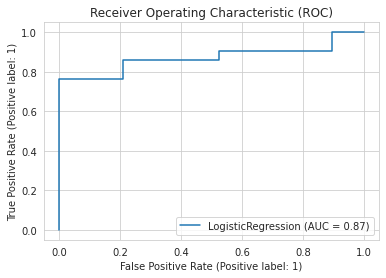

Score_1:  0.825


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import roc_curve

logit = LogisticRegression()
logit.fit(x_train, y_train)

predicted_logit = logit.predict(x_test)

LogisticRegressionScore = accuracy_score(predicted_logit, y_test)


plt.figure()
metrics.plot_roc_curve(logit, x_test, y_test)
plt.title("Receiver Operating Characteristic (ROC)")
plt.show()

print("Score_1: ", LogisticRegressionScore)
Score_1 = LogisticRegressionScore

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
rnd_clf.fit(x_train, y_train)
                                                                                              #RANDOM FOREST CLASSIFIERS
rnd_clf_pred = rnd_clf.predict(x_test)

rnd_clf_accuracy = metrics.accuracy_score(y_test, rnd_clf_pred)
print("Score_2: ",rnd_clf_accuracy)
Score_2 = rnd_clf_accuracy


Score_2:  0.8


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
                                                                                       #LINEAR REGRESSION
lr = LinearRegression()
lr.fit(x_train, y_train)

predicted = lr.predict(x_test)

RMSE = np.sqrt(mean_squared_error(y_test, predicted))
r2 = r2_score(y_test, predicted)

print('Score_3: ', RMSE)
print("r2: ", r2)
Core = r2 + RMSE
print(Core)

Score_3:  0.41344795379753874
r2:  0.31452948170677997
0.7279774355043187


In [ ]:
r2

0.31452948170677997

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


KNC = KNeighborsClassifier(n_neighbors=2)
KNC.fit(x_train, y_train)

KNC_pred = KNC.predict(x_test)

KNC_accuracy = metrics.accuracy_score(y_test, KNC_pred)

print("Score_4: ", KNC_accuracy)
Score_4 =  KNC_accuracy

Score_4:  0.55


In [ ]:
data = {'Estimator':[ 'Logistic Regression',
                         'Random Forest',
                        'Linear Regression',
                      'K-Nearest Neighbor'],
        "Accuracy":[Score_1,
                    Score_2
                    , r2,
                    Score_4,]
        }

data = pd.DataFrame(data)

data.sort_values('Accuracy', ascending='False')

,Estimator,Accuracy
2,Linear Regression,0.314529
3,K-Nearest Neighbor,0.550000
1,Random Forest,0.800000
0,Logistic Regression,0.825000


In [ ]:
target = df['Heart Disease'].map({'Presence':1, 'Absence':0})
inputs = df.drop(['Heart Disease'], axis=1)

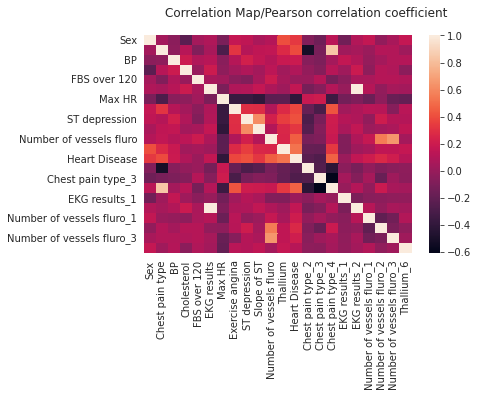

In [ ]:
plt.suptitle("Correlation Map/Pearson correlation coefficient")
sns.heatmap(df.iloc[:,1:-1].corr())

plt.show()